In [110]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(10, 7)

In [111]:
train = pd.read_csv(r'../input/train.csv', sep="," , encoding="UTF8" )
print(train.shape)
test = pd.read_csv(r'../input/test.csv', sep="," , encoding="UTF8" )
print(test.shape)

(13730, 167)
(4576, 47)


In [112]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [113]:
train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q037,-0.004914,NaN,-0.013479,-0.013647,-0.003569,0.002294,0.086642,0.032588,-0.024174,-0.024201,...,0.220839,0.225791,0.245757,0.202230,0.387722,1.000000,0.496678,0.254418,0.270380,0.187921
Q038,0.003906,NaN,-0.032710,-0.032467,-0.035306,-0.014725,0.069298,0.024112,-0.038666,-0.038305,...,0.159887,0.223508,0.215767,0.142610,0.378421,0.496678,1.000000,0.374424,0.259947,0.219529
Q039,0.001002,NaN,-0.094862,-0.094113,-0.069973,-0.066346,0.046830,0.011327,-0.097273,-0.096666,...,0.144264,0.206979,0.189252,0.225724,0.270343,0.254418,0.374424,1.000000,0.305357,0.262031
Q040,-0.010967,NaN,-0.077456,-0.076838,-0.010988,-0.022736,0.053556,0.014847,-0.081490,-0.080963,...,0.215292,0.176028,0.243190,0.179292,0.177025,0.270380,0.259947,0.305357,1.000000,0.306438


In [114]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [115]:
features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [116]:
train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

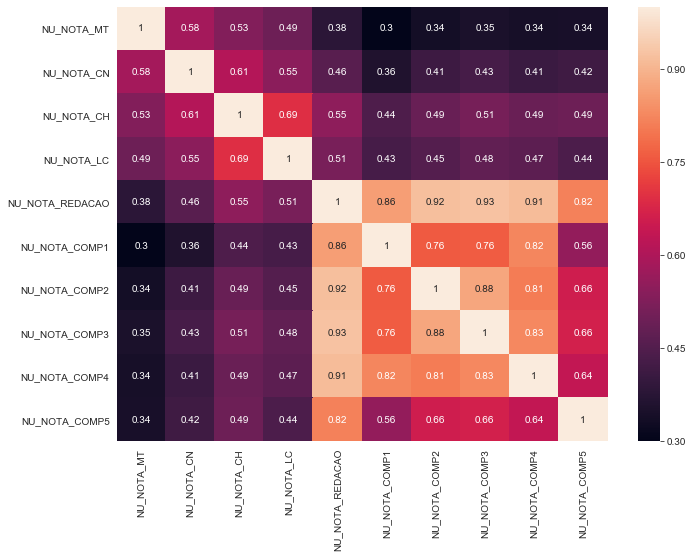

In [117]:
corr = train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10});

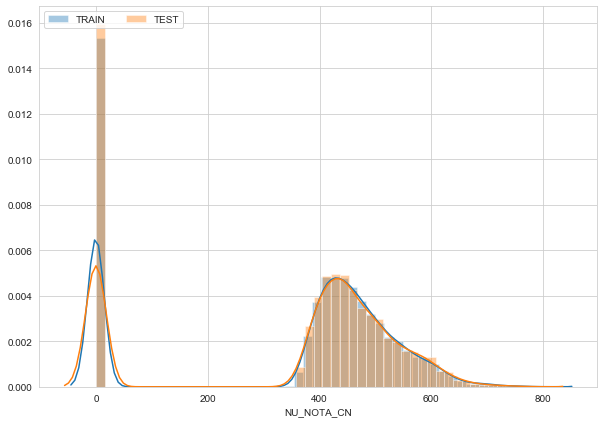

In [118]:
x0 = train['NU_NOTA_CN'].fillna(0)
x1 = test['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

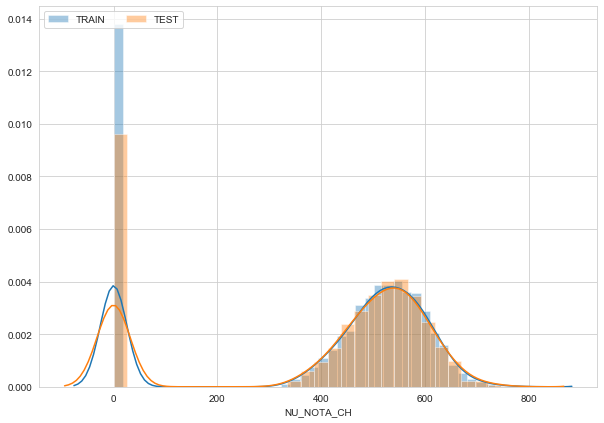

In [119]:
x0 = train['NU_NOTA_CH'].fillna(0)
x1 = test['NU_NOTA_CH'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

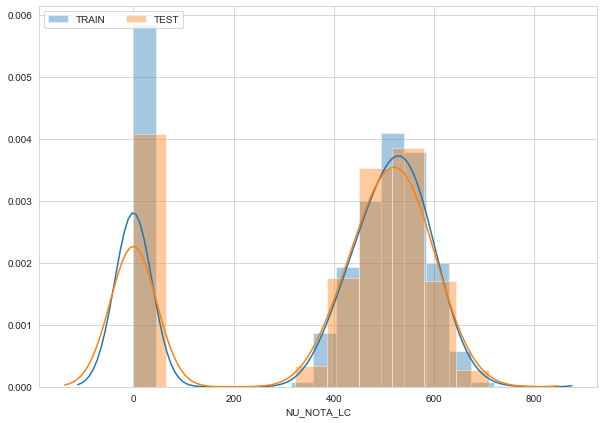

In [120]:
x0 = train['NU_NOTA_LC'].fillna(0)
x1 = test['NU_NOTA_LC'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

# Estratégia 01 - Seleciona somente linhas com valores não nules e diferentes de 0

In [121]:
train = train.loc[(train['NU_NOTA_CN'].notnull()) & (train['NU_NOTA_CN'] != 0) & 
                  (train['NU_NOTA_CH'].notnull()) & (train['NU_NOTA_CH'] != 0) & 
                  (train['NU_NOTA_LC'].notnull()) & (train['NU_NOTA_LC'] != 0) & 
                  (train['NU_NOTA_REDACAO'].notnull()) & (train['NU_NOTA_REDACAO'] != 0)]

In [122]:
test[features].isnull().sum()


NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64

In [123]:
# test = test.loc[(test['NU_NOTA_CN'].notnull()) & (test['NU_NOTA_CN'] != 0) & 
#                 (test['NU_NOTA_CH'].notnull()) & (test['NU_NOTA_CH'] != 0) &
#                 (test['NU_NOTA_LC'].notnull()) & (test['NU_NOTA_LC'] != 0) & 
#                 (test['NU_NOTA_REDACAO'].notnull()) & (test['NU_NOTA_REDACAO'] != 0)]

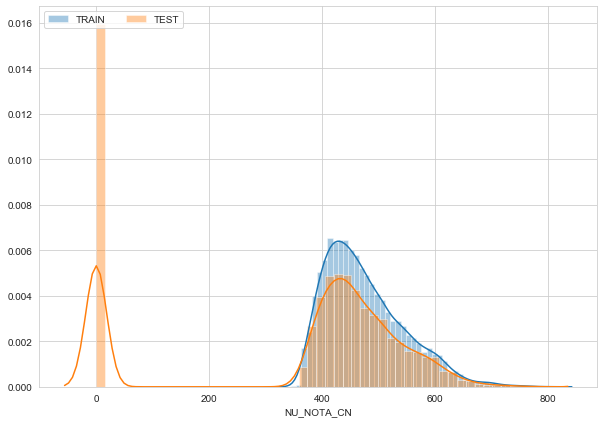

In [124]:
x0 = train['NU_NOTA_CN'].fillna(0)
x1 = test['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

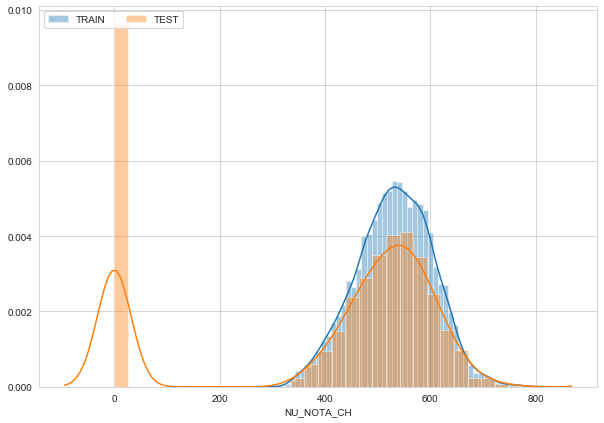

In [125]:
x0 = train['NU_NOTA_CH'].fillna(0)
x1 = test['NU_NOTA_CH'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

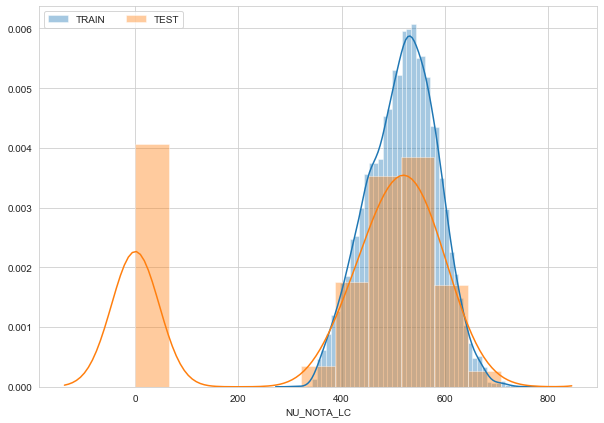

In [126]:
x0 = train['NU_NOTA_LC'].fillna(0)
x1 = test['NU_NOTA_LC'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [132]:
test['NU_NOTA_CN'].fillna(0,inplace = True)
test['NU_NOTA_CH'].fillna(0,inplace = True)
test['NU_NOTA_LC'].fillna(0,inplace = True)
test['NU_NOTA_REDACAO'].fillna(0,inplace = True)

test['NU_NOTA_COMP1'].fillna(0,inplace = True)
test['NU_NOTA_COMP2'].fillna(0,inplace = True)
test['NU_NOTA_COMP3'].fillna(0,inplace = True)
test['NU_NOTA_COMP4'].fillna(0,inplace = True)
test['NU_NOTA_COMP5'].fillna(0,inplace = True)

train['NU_NOTA_COMP1'].fillna(0,inplace =True)
train['NU_NOTA_COMP2'].fillna(0,inplace = True)
train['NU_NOTA_COMP3'].fillna(0,inplace = True)
train['NU_NOTA_COMP4'].fillna(0,inplace = True)
train['NU_NOTA_COMP5'].fillna(0,inplace = True)

# Save preprocessed data

In [134]:
train.to_csv('../data/final-train.csv', sep=';', index=False)
print(train.shape)
test.to_csv('../data/final-test.csv', sep=';', index=False)
print(test.shape)

(9852, 167)
(4576, 47)


# Compare Results

In [135]:
lr_scores = pd.read_csv(r'../results/lr_scores.csv', sep=';',encoding="UTF8")
rf_scores = pd.read_csv(r'../results/rf_scores.csv', sep=';',encoding="UTF8")
lgbm_scores = pd.read_csv(r'../results/lgbm_scores.csv', sep=';',encoding="UTF8")
xgb_scores = pd.read_csv(r'../results/xgb_scores.csv', sep=';',encoding="UTF8")

In [136]:
scores = pd.concat([lr_scores, rf_scores, xgb_scores, lgbm_scores], axis=1)
index = ['R2','RMSE','MAE']
scores.index = index
scores

,Linear Regression,Random Forest Regressor,XGBoost Regressor,LightGBM Regressor
R2,0.403958,0.524772,0.539797,0.936950
RMSE,76.601547,68.399066,67.309109,24.913794
MAE,60.958705,53.313489,53.424566,18.986880
